In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline
import re

df = pd.read_csv("Mirena_TCS_Train.csv", encoding='cp1252', error_bad_lines=False)
df.head() 

,Sr No.,Reported_Event,EVENT Preferred Term (Seriousness) (Event),EVENT_Lower_Level_Term(Seriousness),EVENT Onset Date (Event),EVENT Seriousness Criteria (Event),EVENT Company Causality (Event Assessment),EVENT Reporter Causality (Event Assessment),SUSPECT PRODUCT Product (as reported),SUSPECT PRODUCT Product Name (Suspect)
0,1,1) IUD migrated to lower uterine segment/ IUS ...,1) Device dislocation (s); \n2) Genital haemor...,1) IUD migration (s); \n2) Genital bleeding (s...,1) Device dislocation : 2016; \n2) Genital hae...,1) Device dislocation : Medically Significan...,1) SAG0224B.282 - 1) Device dislocation : rela...,1) SAG0224B.282 - 1) Device dislocation : not ...,1) --,1) Mirena
1,2,1) Patient removed the IUD by herself;,1) Intentional medical device removal by patie...,1) Intentional medical device removal by patie...,1) Intentional medical device removal by patie...,NaN,1) Study Drug - 1) Intentional medical device ...,1) Study Drug - 1) Intentional medical device ...,1) Mirena,1) Mirena
2,3,1) Patient was perforated during insertion pro...,1) Uterine perforation (s); \n2) Complication ...,1) Uterine perforation post procedural (s); \n...,1) Uterine perforation : --; \n2) Complication...,1) Uterine perforation : Medically Significa...,1) SAG0224B.282 - 1) Uterine perforation : rel...,1) SAG0224B.282 - 1) Uterine perforation : not...,1) --,1) Mirena
3,4,1) one to the arms of the T body was embeded i...,1) Embedded device (s); \n2) Abdominal pain (n);,1) IUD embedded (s); \n2) Abdominal pain (n);,1) Embedded device : 2016; \n2) Abdominal pain...,1) Embedded device : Medically Significant /,1) SAG0224B.282 - 1) Embedded device : related,1) SAG0224B.282 - 1) Embedded device : not rep...,1) --,1) Mirena
4,5,1) Mirena was partially expelled;,1) Device expulsion (n);,1) Partial expulsion of IUD (n);,1) Device expulsion : --;,NaN,1) Study Drug - 1) Device expulsion : related,1) Study Drug - 1) Device expulsion : not repo...,1) Mirena,1) Mirena


In [7]:
df.columns

Index(['Sr No.', 'Reported_Event',
       'EVENT Preferred Term (Seriousness) (Event)',
       'EVENT_Lower_Level_Term(Seriousness)', 'EVENT Onset Date (Event)',
       'EVENT Seriousness Criteria (Event)',
       'EVENT Company Causality (Event Assessment)',
       'EVENT Reporter Causality (Event Assessment)',
       'SUSPECT PRODUCT Product (as reported)',
       'SUSPECT PRODUCT Product Name (Suspect)'],
      dtype='object')

In [8]:
df.drop(columns = ['Sr No.','EVENT Preferred Term (Seriousness) (Event)',
                   'EVENT_Lower_Level_Term(Seriousness)',
                   'EVENT Onset Date (Event)',
                   'EVENT Seriousness Criteria (Event)',
                   'EVENT Company Causality (Event Assessment)',
                   'EVENT Reporter Causality (Event Assessment)',
                   'SUSPECT PRODUCT Product (as reported)',
                   'SUSPECT PRODUCT Product Name (Suspect)'],inplace = True)
df.head()

,Reported_Event
0,1) IUD migrated to lower uterine segment/ IUS ...
1,1) Patient removed the IUD by herself;
2,1) Patient was perforated during insertion pro...
3,1) one to the arms of the T body was embeded i...
4,1) Mirena was partially expelled;


In [9]:
df['Reported_Event']=df['Reported_Event'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [10]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = df['Reported_Event'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [11]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[100:210])

2891
['anterior', 'anteriorly', 'antibiotics', 'anxiety', 'anxious', 'anymore', 'apart', 'apetite', 'apex', 'app', 'apparently', 'appear', 'appeared', 'appearing', 'appears', 'appendicitis', 'appendix', 'appered', 'appetite', 'appointment', 'approaching', 'appropriate', 'approx', 'approximately', 'appt', 'apr', 'april', 'ar', 'area', 'areas', 'arm', 'arms', 'arthritis', 'asap', 'aside', 'asked', 'asleep', 'aspect', 'ass', 'associated', 'assume', 'assymptomatic', 'astronomical', 'ate', 'atelectasis', 'atm', 'attached', 'attack', 'attacks', 'attampted', 'attempt', 'attempted', 'attempting', 'attempts', 'attending', 'attributes', 'atypical', 'aug', 'august', 'aunt', 'aura', 'auras', 'auro', 'autistic', 'avoid', 'avulsed', 'awaiting', 'awake', 'awakens', 'away', 'awful', 'awhile', 'awol', 'babies', 'baby', 'babymomma', 'bacne', 'bacteria', 'bacterial', 'bad', 'badly', 'bae', 'bag', 'balance', 'bald', 'balled', 'bared', 'barely', 'base', 'based', 'basically', 'bath', 'bathroom', 'bawling', 

In [12]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [13]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50]) 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


2275
["'s", 'abdomen', 'abdomin', 'abdomini', 'abl', 'abnorm', 'abolish', 'abort', 'abov', 'abscess', 'absenc', 'absolut', 'abus', 'access', 'accid', 'accident', 'accord', 'acen', 'ach', 'achi', 'acn', 'actinomycet', 'actinomycosi', 'activ', 'actual', 'acut', 'addit', 'adenomyosi', 'adher', 'adhes', 'adjust', 'admit', 'adnex', 'adnexa', 'adren', 'advanc', 'advers', 'advil', 'ae', 'af', 'afer', 'affect', 'afraid', 'afternoon', 'afterward', 'afterword', 'ag', 'aggress', 'agit', 'ago']


In [14]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

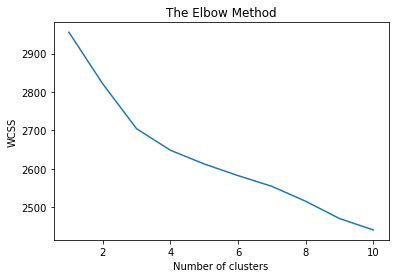

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [16]:
#3

kmeans = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


0 : expel, mirena, iud, home, patient, partial, devic, unit, insert, day, offic, cervix, tampon, bleed, heavi, ius, cramp, remov, left, thread, week, fell, place, cut, pt
1 : expuls, partial, mirena, spontan, offic, ius, iud, insert, home, cervix, patient, day, confirm, period, expel, came, canal, vagin, cervic, week, fundal, posit, fall, unit, remov
2 : mirena, iud, pain, insert, bleed, period, cramp, patient, remov, lower, posit, cervix, injuri, uterin, segment, ius, fell, spot, fundal, uterus, string, year, feel, perfor, heavi


In [17]:
kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


0 : expuls, partial, mirena, spontan, offic, iud, insert, ius, home, expel, day, patient, came, cervix, confirm, period, canal, devic, vagin, experienc, cervic, week, cramp, fall, unit
1 : expel, mirena, iud, home, partial, patient, unit, devic, insert, day, cervix, tampon, bleed, heavi, offic, cramp, remov, place, cut, left, week, ius, fell, thread, period
2 : lower, segment, fundal, posit, uterin, ius, iud, mirena, ultrasound, cervix, pain, insert, bleed, caviti, expel, canal, partial, string, uterus, low, correct, patient, cervic, arm, locat
3 : mirena, iud, pain, insert, bleed, period, cramp, patient, remov, cervix, fell, spot, year, string, uterus, feel, perfor, devic, heavi, came, day, month, dure, effect, like
4 : injuri, abdomen, iud, remov, signific, emot, migrat, pregnanc, drug, lack, effect, mirena, perfor, ius, uterus, finger, flare, flash, floater, flow, fluid, flush, fit, fibroid, fine


In [18]:
kmeans = KMeans(n_clusters = 10, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# Finally, we look at 8 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


0 : period, mirena, pain, cramp, year, spot, effect, feel, like, got, day, lack, drug, month, pregnanc, pregnant, bleed, bad, week, stop, string, hair, gain, i'm, weight
1 : injuri, signific, emot, migrat, pregnanc, drug, lack, effect, perfor, ius, uterus, iud, fealt, foggi, fog, flush, fluid, flow, floater, fals, flash, flare, far, fit, finger
2 : segment, lower, uterin, iud, mirena, ultrasound, bleed, ius, pain, cervix, insert, caviti, posit, string, arm, partial, migrat, myometrium, fundal, heavi, patient, locat, expel, displac, reveal
3 : mirena, iud, remov, cervix, patient, uterus, came, perfor, string, cervic, pain, expel, place, thread, embed, canal, ultrasound, partial, os, locat, devic, insert, hcp, dure, bleed
4 : fell, mirena, iud, patient, home, expel, expuls, devic, day, cramp, month, week, string, later, came, insert, placement, ius, bathroom, displac, period, hair, night, today, pregnant
5 : insert, bleed, pain, fail, mirena, patient, cramp, heavi, iud, irregular, toler,